In [21]:
!conda install -c conda-forge xgboost -y


Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Manish\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    ca-certificates-2025.8.3   |       h4c7d964_0         151 KB  conda-forge
    certifi-2025.8.3           |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-24.11.3              |  py312h2e8e312_0         1.1 MB  conda-forge
    libexpat-2.6.3             |       he0c23c2_0         136 KB  conda-forge
    libsqlite-3.50.4           |       hf5d6505_0         1.2 MB  conda-forge
    libxgboost-2.1.3           |   cpu_hb3f76d0_1         1.4 MB  conda-forge
    libzlib-1.2.13             |       h2466b09_6          55 KB  conda-forge
    openssl-3.5.2        

WARNING conda.gateways.repodata:load_state(588): JSONDecodeError loading C:\Users\Manish\anaconda3\pkgs\cache\59ba4880.info.json


In [22]:
import xgboost 
print(xgboost.__version__)

2.1.3


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Number of row and column 
df.shape

(8523, 12)

In [4]:
# Inofrmation about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
 df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Fill the missing value in Item_weight column with mean value
df['Item_Weight'].mean()
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

C:\Users\Manish\AppData\Local\Temp\ipykernel_24400\2154358292.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [7]:
df['Item_Weight'].isnull().sum()

0

In [30]:
import numpy as np

# Detect rows where 'Outlet_Size' has the wrong long string format
df.loc[df['Outlet_Size'].str.contains('Outlet_Type', na=False), 'Outlet_Size'] = np.nan


In [31]:
mode_outlet_size = df.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type', 
    aggfunc=lambda x: x.mode()[0]
)


In [32]:
missing_value = df['Outlet_Size'].isnull()
df.loc[missing_value, 'Outlet_Size'] = df.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_outlet_size.loc[x])


In [33]:
print(df['Outlet_Size'].unique())


['Medium' 'Small' 'High']


In [ ]:
# import numpy as np

# # Detect rows where 'Outlet_Size' has the wrong long string format
# df.loc[df['Outlet_Size'].str.contains('Outlet_Type', na=False), 'Outlet_Size'] = np.nan
# mode_outlet_size = df.pivot_table(
#     values='Outlet_Size',
#     index='Outlet_Type', 
#     aggfunc=lambda x: x.mode()[0]
# )
# missing_value = df['Outlet_Size'].isnull()
# df.loc[missing_value, 'Outlet_Size'] = df.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_outlet_size.loc[x])


In [34]:
df['Outlet_Size'].isnull().sum()

0

### Data Analysis

In [16]:
sns.set()

In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\Users\Manish\AppData\Local\Temp\ipykernel_24400\1980305350.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<function matplotlib.pyplot.show(close=None, block=None)>

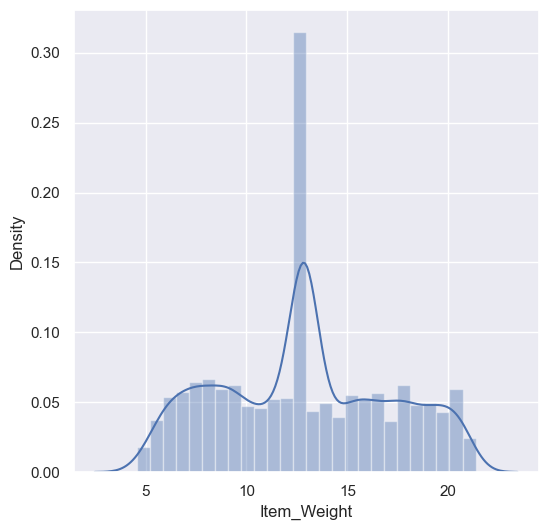

In [18]:
# Data Distribution for Item weight column
plt.figure(figsize = (6,6))
sns.distplot(df['Item_Weight'])
plt.show

C:\Users\Manish\AppData\Local\Temp\ipykernel_24400\2819882178.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<function matplotlib.pyplot.show(close=None, block=None)>

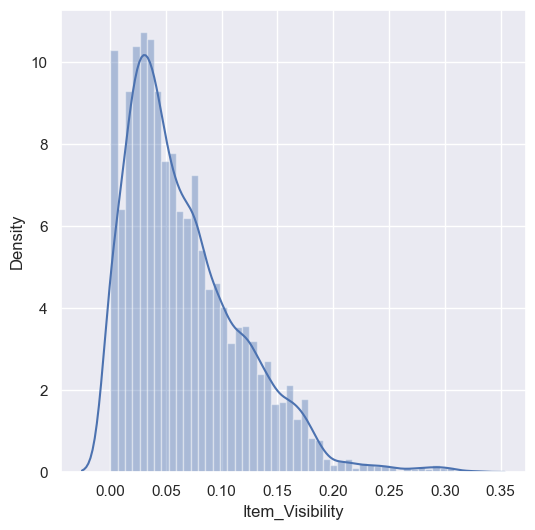

In [19]:
# Data Distribution for item visibility 
plt.figure(figsize = (6,6))
sns.distplot(df['Item_Visibility'])
plt.show

C:\Users\Manish\AppData\Local\Temp\ipykernel_24400\2112703120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


<function matplotlib.pyplot.show(close=None, block=None)>

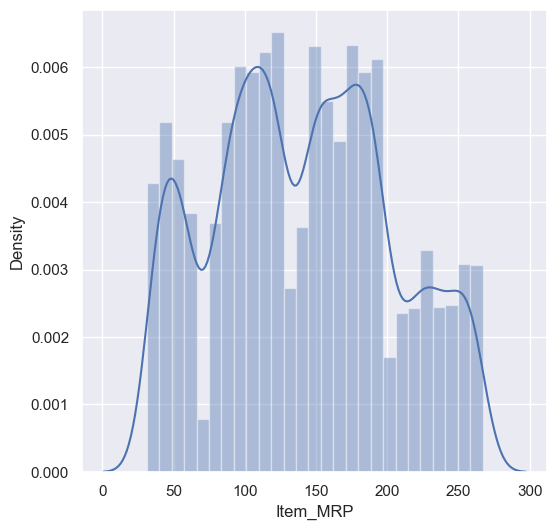

In [20]:
# Data Distribution for item MRP
plt.figure(figsize = (6,6))
sns.distplot(df['Item_MRP'])
plt.show

C:\Users\Manish\AppData\Local\Temp\ipykernel_24400\81326051.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<function matplotlib.pyplot.show(close=None, block=None)>

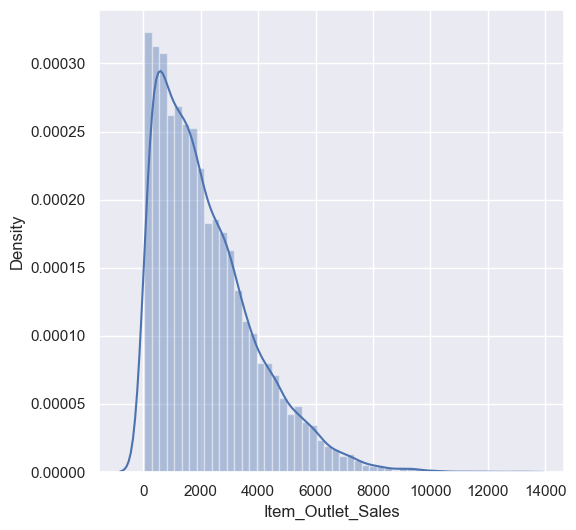

In [21]:
# Data Distribution for Item Outlet sale
plt.figure(figsize = (6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show

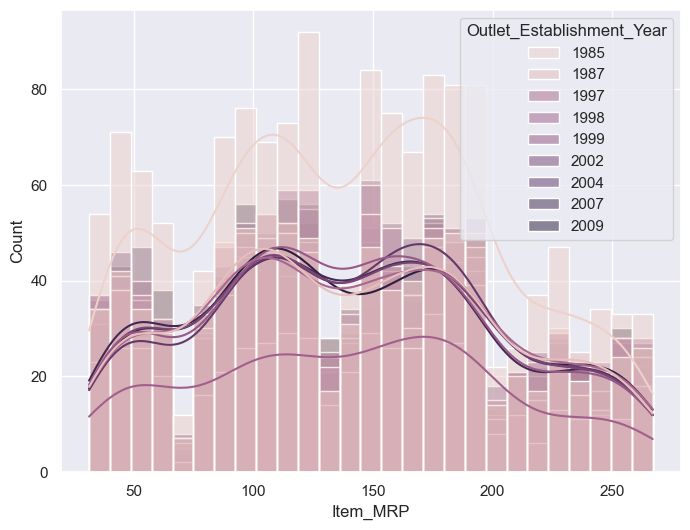

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Item_MRP', hue='Outlet_Establishment_Year', kde=True)
plt.show()


C:\Users\Manish\AppData\Local\Temp\ipykernel_24400\2078011081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Establishment_Year', data=df, palette='Set3')


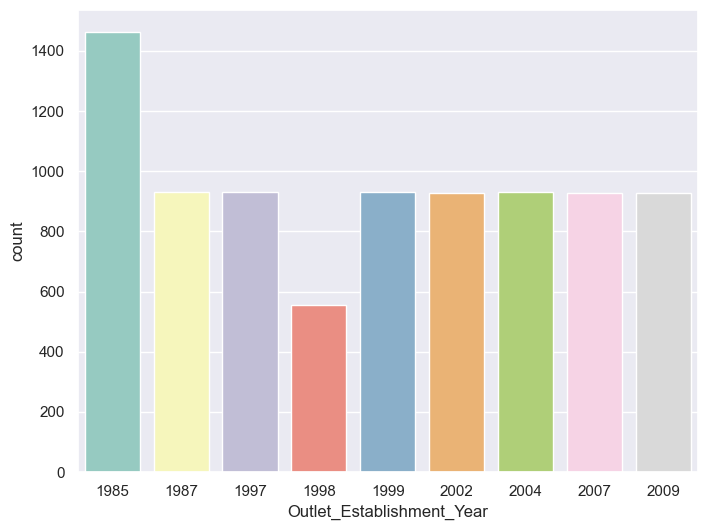

In [23]:
# Outlet Establish according to year
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Establishment_Year', data=df, palette='Set3')
plt.show()

C:\Users\Manish\AppData\Local\Temp\ipykernel_24400\1476139730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=df, palette='Set2')


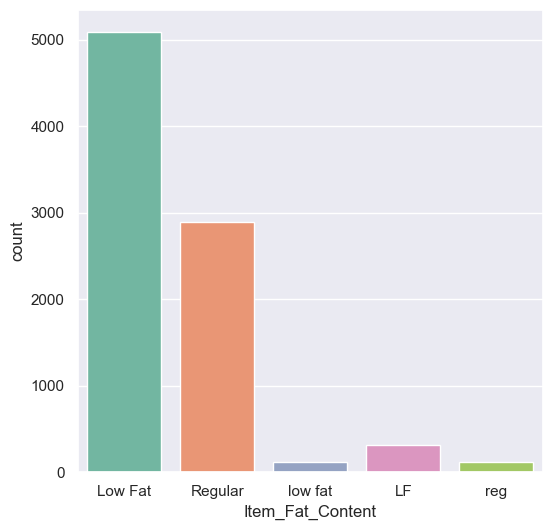

In [24]:
# Outlet Establish according to year
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df, palette='Set2')
plt.show()

C:\Users\Manish\AppData\Local\Temp\ipykernel_24400\772843701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=df, palette='Set3')


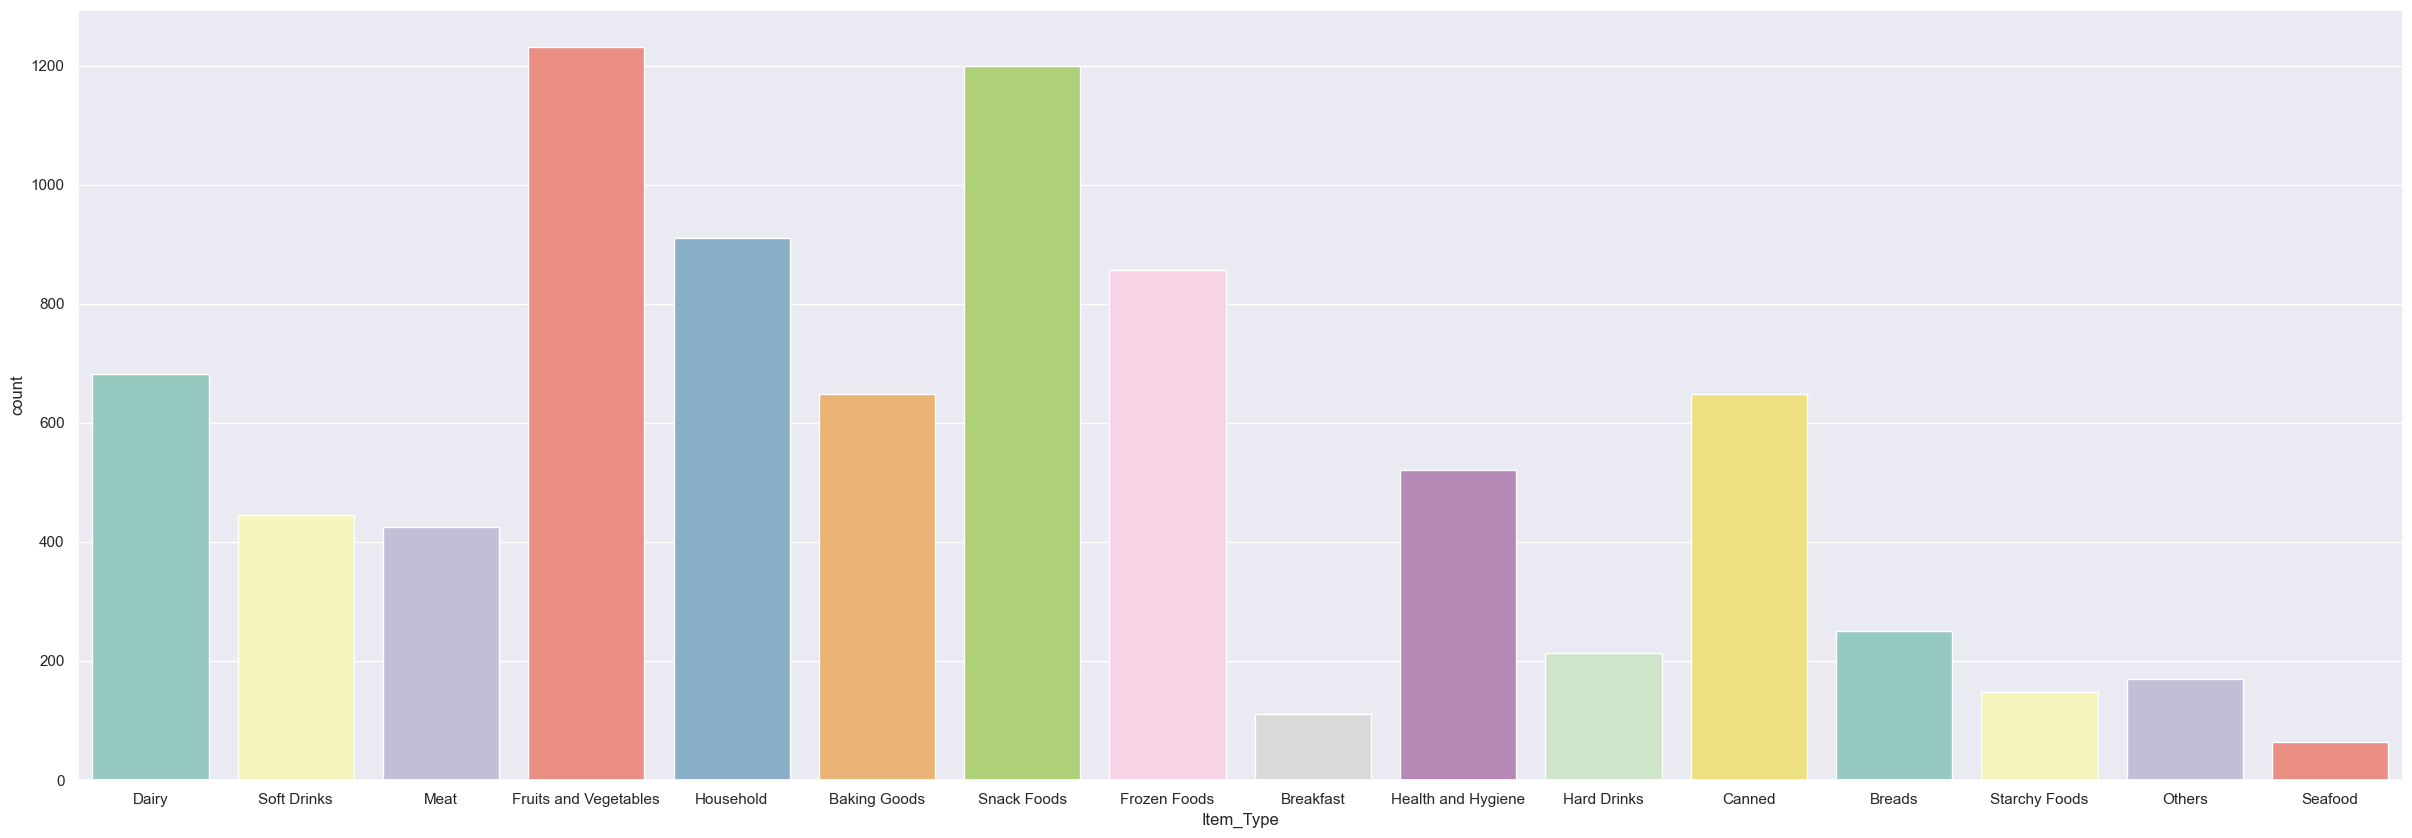

In [25]:
# Item type
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type', data=df, palette='Set3')
plt.show()


In [26]:
df['Outlet_Size'].dtype


dtype('O')

In [27]:
df['Outlet_Size'].isnull().sum()

0

C:\Users\Manish\AppData\Local\Temp\ipykernel_24400\2032207209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size', data=df, palette='Set2')


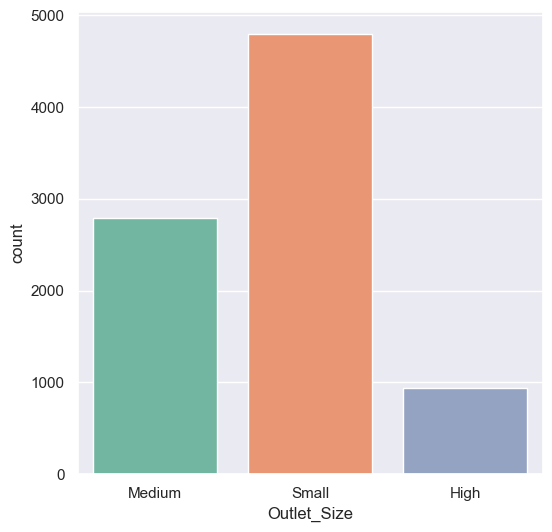

In [37]:


# Now plot
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df, palette='Set2')
plt.show()


### Data PreProcessing 

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [43]:
# Replace LF and low fat into Low Fat and reg into Regular
df.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}}, inplace =True)

In [44]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### Label Encoder

In [45]:
# Convert the cetoegorical data into numerical data
encoder = LabelEncoder()

In [53]:
# For Item Identifier
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

# For Item fat Content
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

# For Item Type
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

# Outlet Identifier
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

# For Outlet Size
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

# For Outlet location type
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

# Outlet Type
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#### Splitting Features and Target

In [56]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']   #For Prediction 

In [59]:
# print(X)
# print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [61]:
# Splitting data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [63]:
print(y.shape, y_train.shape, y_test.shape)

(8523,) (6818,) (1705,)


#### Model Traing with XFBoost Regressor

In [64]:
regressor =  XGBRegressor()

In [65]:
regressor.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [66]:
# For Training data 
training_prediction = regressor.predict(X_train)

In [67]:
r2_train = metrics.r2_score(y_train, training_prediction)

In [68]:
print(r2_train)

0.8762174618111388


In [69]:
# For testing data
testing_prediction = regressor.predict(X_test)

In [71]:
r2_test = metrics.r2_score(y_test, testing_prediction)

In [72]:
print(r2_test)

0.5017253991620692


In [73]:
df.to_csv('processed_dataset', index=False)

In [74]:
df.to_excel('preprocessed_data111.xlsx', index=False)


In [123]:
import joblib
joblib.dump(model, "xgboost_model.pkl")

['xgboost_model.pkl']

### Test the model 

In [130]:
# # import xgboost as xgb
# model = xgb.Booster()
# model.load_model("xgboost_model.pkl")  # might fail if pickled instead of saved with save_model


In [131]:
# testing my model 
# test_df = pd.read_csv('test.csv')

In [132]:
# test_df.head()

In [133]:
# Label encoder 
# encoder = LabelEncoder()

In [134]:
# df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
# df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
# df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
# df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
# df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
# df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
# df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [135]:
# test_df.isnull().sum()

In [136]:
# # Preprocessing
# # Fill the missing value in Item_weight column with mean value
# test_df['Item_Weight'].mean()
# test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)

In [137]:
# test_df.isnull().sum()

In [138]:
# import numpy as np

# # Detect rows where 'Outlet_Size' has the wrong long string format
# test_df.loc[test_df['Outlet_Size'].str.contains('Outlet_Type', na=False), 'Outlet_Size'] = np.nan
# mode_outlet_size = test_df.pivot_table(
#     values='Outlet_Size',
#     index='Outlet_Type', 
#     aggfunc=lambda x: x.mode()[0]
# )
# missing_value = test_df['Outlet_Size'].isnull()
# test_df.loc[missing_value, 'Outlet_Size'] = test_df.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_outlet_size.loc[x])


In [139]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [141]:
# # Make Prediction 
# predictions = pipeline_model.predict(test_df)


# # print("Predictions:", predictions[:10])  # Show first 10 predictions
